# Task - 5 Exploratory Data Analysis on Dataset - Terrorism
### Author: ***S Sakthe Abishek, Amrita Vishwa Vidyapeetham,Coimbatore Campus***

As a security/defense analyst, try to find out the hot zone of terrorism.

**Link for the dataset:** https://bit.ly/3ZyOItK

# Importing the necessary libraries



In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the dataset

In [5]:
data=pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34475 entries, 0 to 34474
Columns: 135 entries, eventid to related
dtypes: float64(58), int64(20), object(57)
memory usage: 35.5+ MB


In [7]:
df.shape

(34475, 135)

In [8]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
for i in df.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

##Cleaning the data

In [10]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [11]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

In [12]:
df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34475 entries, 0 to 34474
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            34475 non-null  int64  
 1   Month           34475 non-null  int64  
 2   Day             34475 non-null  int64  
 3   Country         34475 non-null  object 
 4   Region          34475 non-null  object 
 5   Province/State  34344 non-null  object 
 6   City            34475 non-null  object 
 7   Latitude        32592 non-null  float64
 8   Longitude       32592 non-null  float64
 9   Location        698 non-null    object 
 10  Summary         1129 non-null   object 
 11  Attack Type     34475 non-null  object 
 12  Target Type     34475 non-null  object 
 13  Group Name      34475 non-null  object 
 14  Motive          858 non-null    object 
 15  Weapon Type     34474 non-null  object 
 16  Killed          28849 non-null  float64
 17  Wounded         27041 non-null 

In [14]:
df.shape

(34475, 19)

In [15]:
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Country               0
Region                0
Province/State      131
City                  0
Latitude           1883
Longitude          1883
Location          33777
Summary           33346
Attack Type           0
Target Type           0
Group Name            0
Motive            33617
Weapon Type           1
Killed             5626
Wounded            7434
Add Notes         33624
dtype: int64

In [16]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]

In [18]:
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,34475.000000,34475.000000,34475.000000,32592.000000,3.259200e+04,34475.000000,34475.000000,34475.000000
mean,1981.644525,6.233648,15.228978,18.521995,-2.675146e+03,1.829036,1.351559,3.180595
std,4.386154,3.394320,8.849860,25.504563,4.773979e+05,8.592217,10.002148,14.479950
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1979.000000,3.000000,8.000000,5.252105,-7.851209e+01,0.000000,0.000000,0.000000
50%,1982.000000,6.000000,15.000000,14.622869,-6.606113e+01,0.000000,0.000000,0.000000
75%,1985.000000,9.000000,23.000000,40.917977,1.050799e+01,1.000000,0.000000,1.000000
max,1988.000000,12.000000,31.000000,64.837778,1.784419e+02,422.000000,751.000000,760.000000


#### Observation
1. The data consists of terrorist activities ranging from the year: 1970 to 1988
2. Maximum number of people killed in an event were: 422
3. Maximum number of people wounded in an event were: 751
4. Maximum number of total casualties in an event were: 760

## Visualizing the data

### 1. Year wise Attacks

1. Number of Attacks in each Year

In [19]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head()

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


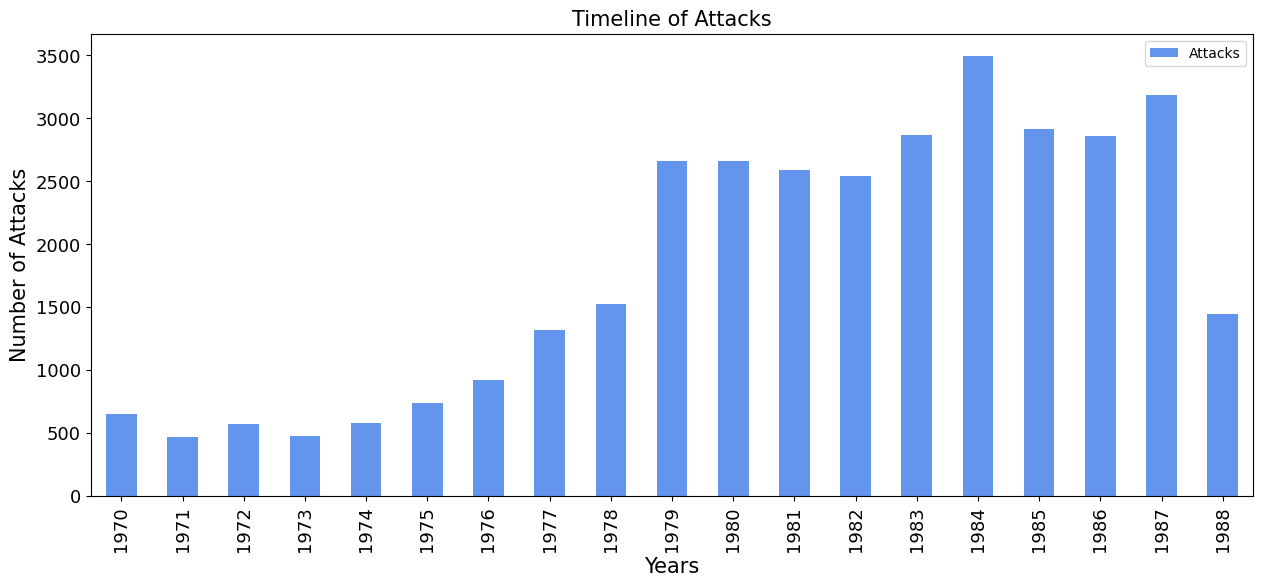

In [20]:
attacks.plot(kind="bar",color="cornflowerblue",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

(i). Most number of attacks(3460) in 1984<br>
(ii). Least number of attacks(471) in 1971

2. Total Casualties (Killed + Wounded) in each Year

In [21]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head()

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


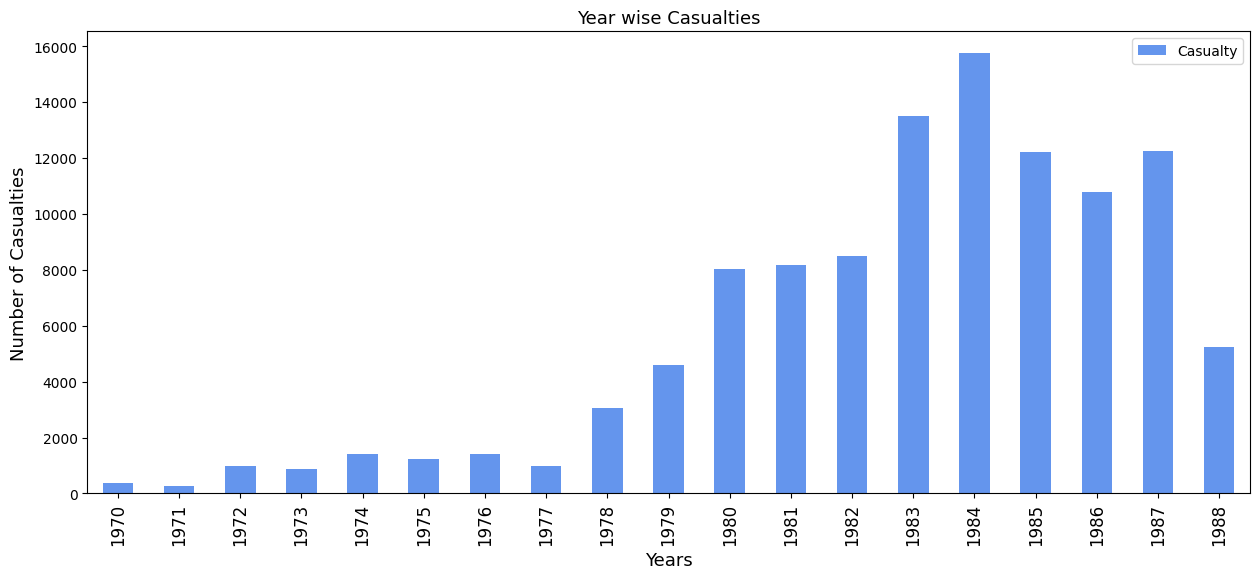

In [22]:
yc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed in each Year

In [23]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


4. Wounded in each Region

In [24]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head()

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


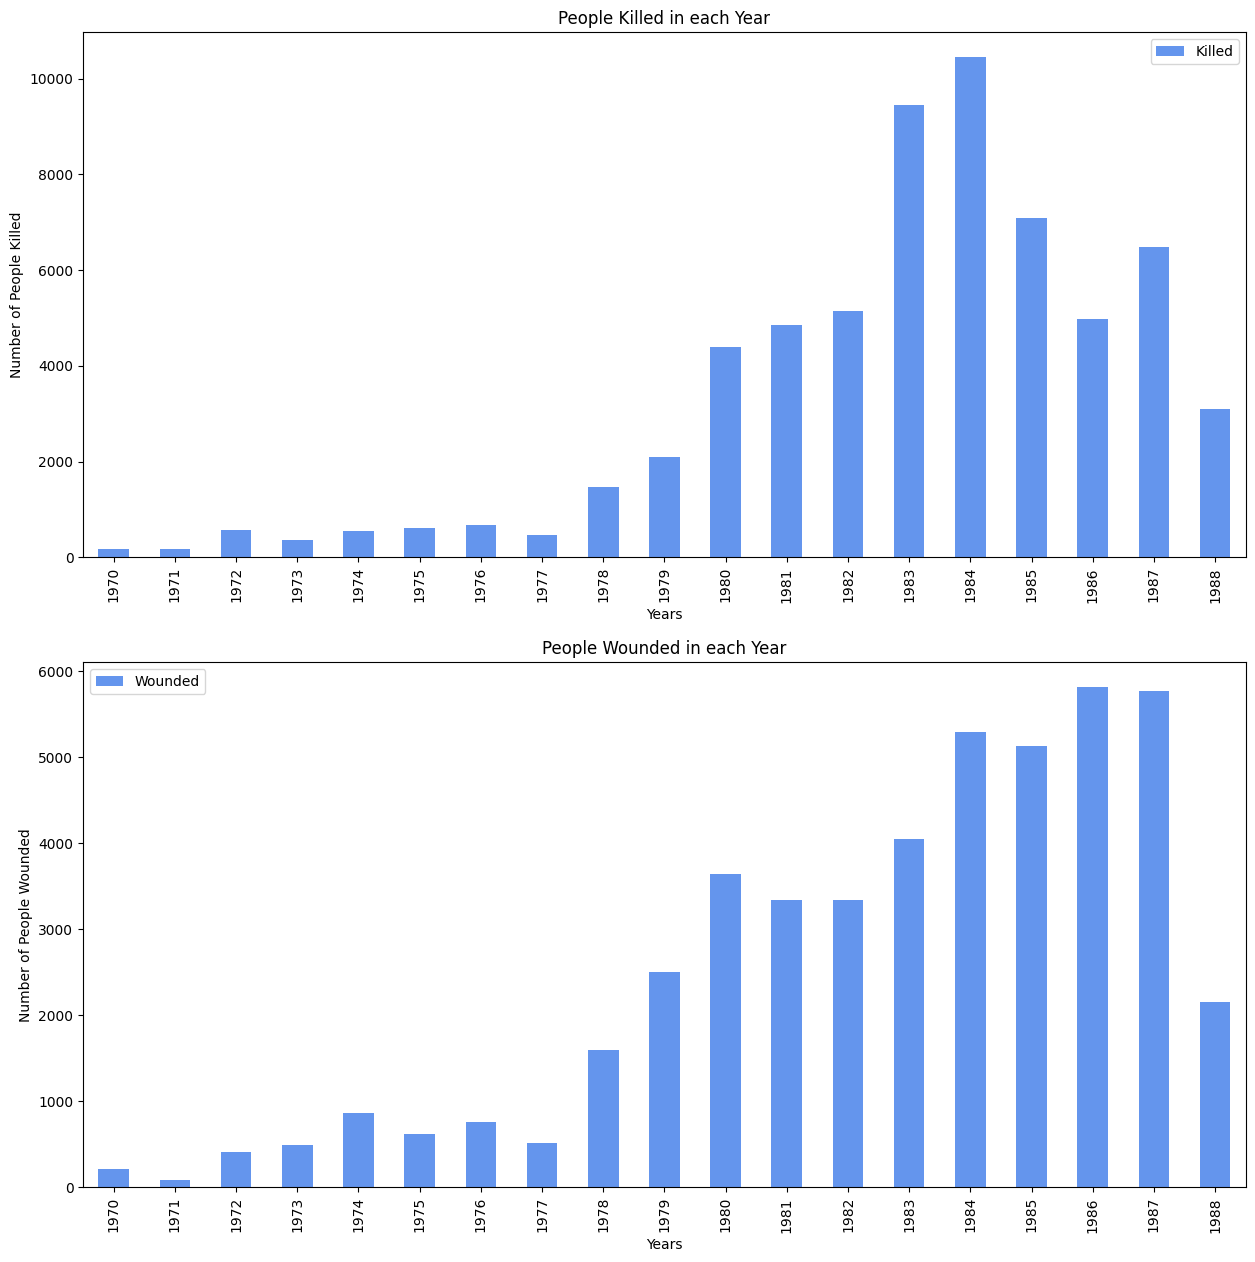

In [25]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed")

#Wounded
yw.plot(kind="bar",color="cornflowerblue",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 2. Region wise Attacks

1. Distribution of Terrorist Attacks over Regions from 1970-1988

In [64]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


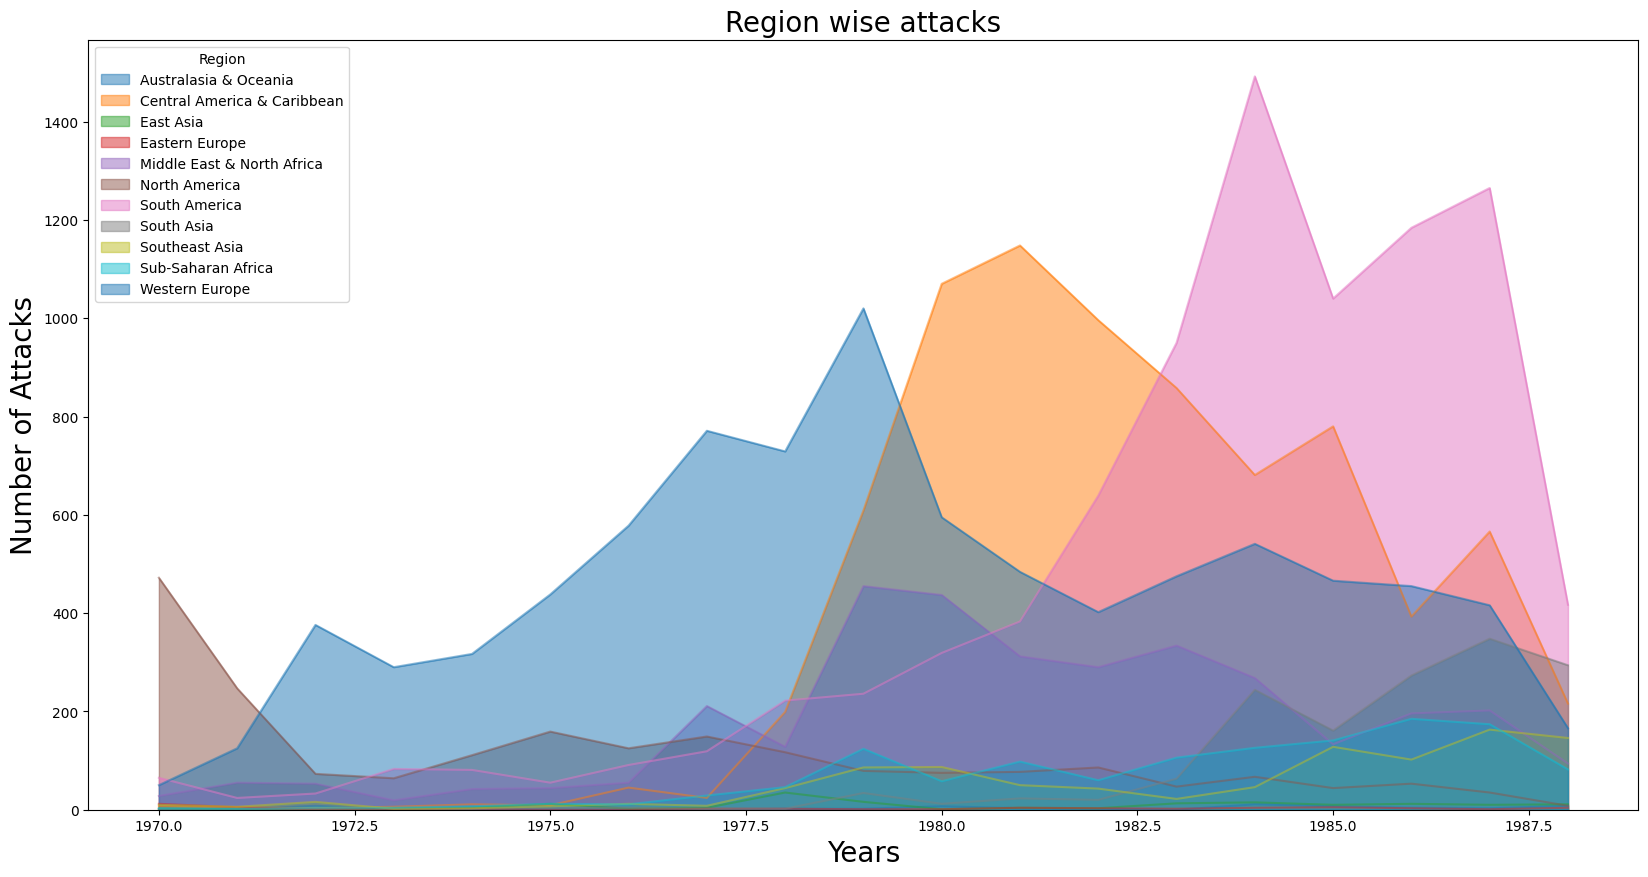

In [27]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

2. Total Terrorist Attacks in each Region from 1970-1988

In [28]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
South America                  8698
Western Europe                 8694
Central America & Caribbean    7626
Middle East & North Africa     3356
North America                  2088
South Asia                     1489
Sub-Saharan Africa             1272
Southeast Asia                  981
East Asia                       157
Australasia & Oceania            61
Eastern Europe                   53
Name: Total, dtype: int64

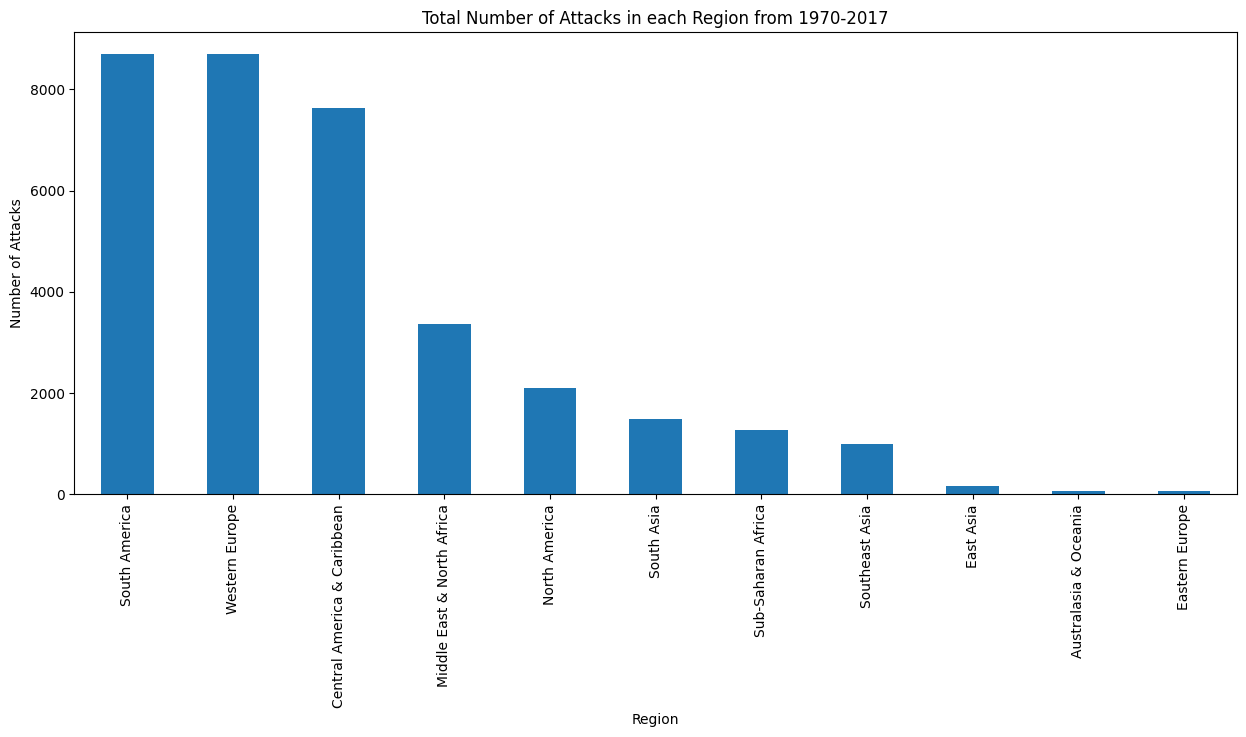

In [29]:
ra.plot(kind="bar",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

3. Total Casualties (Killed + Wounded) in each Region

In [30]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc

,Casualty
Region,
Central America & Caribbean,31590.0
Middle East & North Africa,18227.0
South America,16755.0
Western Europe,12711.0
South Asia,12083.0
Sub-Saharan Africa,8336.0
Southeast Asia,7253.0
North America,2273.0
East Asia,204.0


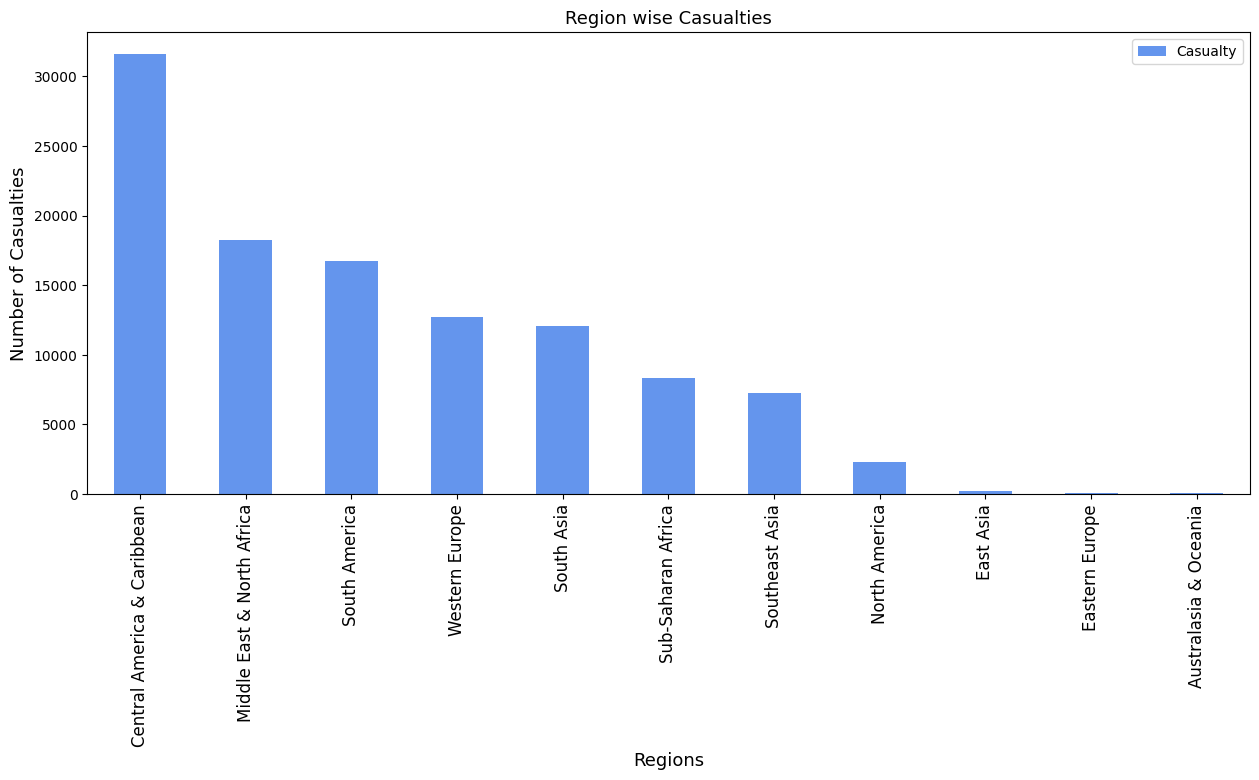

In [31]:
rc.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

4. Killed in each Region

In [32]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk

,Killed
Region,
Central America & Caribbean,26119.0
South America,12498.0
Middle East & North Africa,5886.0
South Asia,5781.0
Western Europe,4408.0
Sub-Saharan Africa,4359.0
Southeast Asia,3203.0
North America,667.0
East Asia,52.0


5. Wounded in each Region

In [33]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw

,Wounded
Region,
Middle East & North Africa,12341.0
Western Europe,8303.0
South Asia,6302.0
Central America & Caribbean,5471.0
South America,4257.0
Southeast Asia,4050.0
Sub-Saharan Africa,3977.0
North America,1606.0
East Asia,152.0


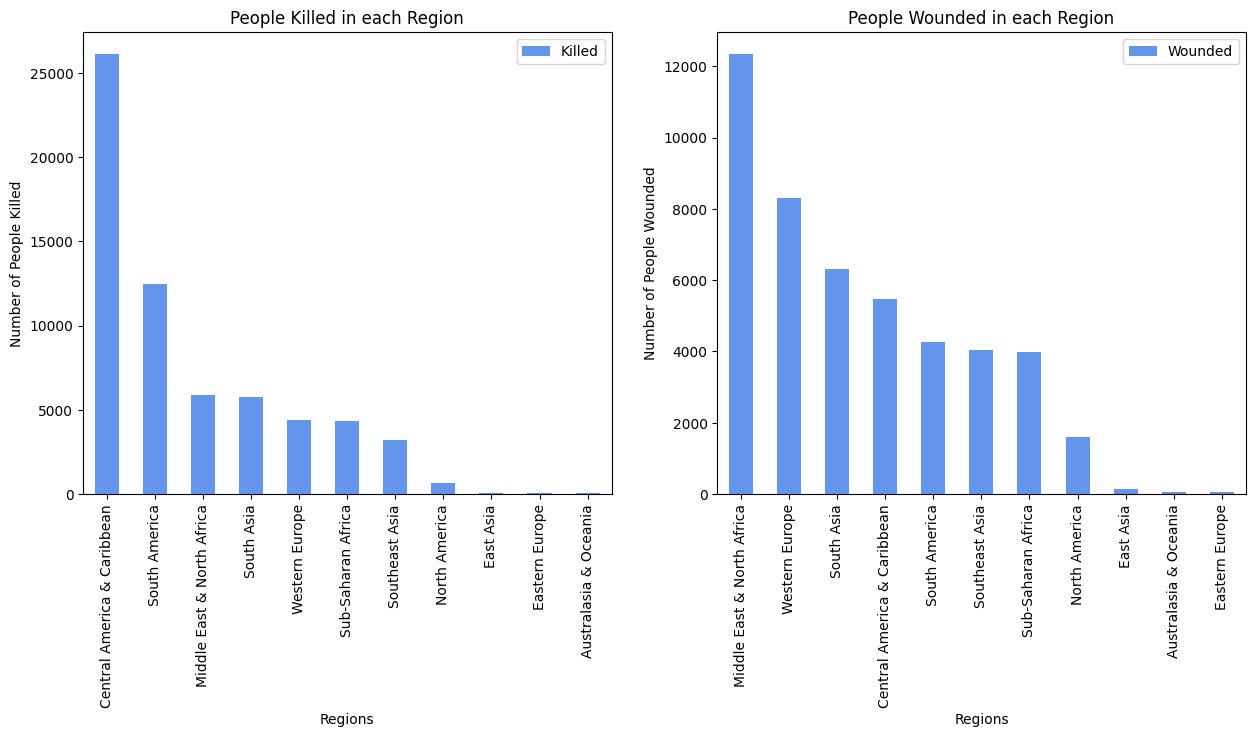

In [34]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 3. Country wise Attacks - Top 10

1. Number of Attacks in each Country

In [35]:
ct=df["Country"].value_counts().head(10)
ct

El Salvador       3980
Peru              3381
United Kingdom    2656
Colombia          2646
Spain             1997
United States     1932
Nicaragua         1732
Chile             1550
Guatemala         1510
France            1294
Name: Country, dtype: int64

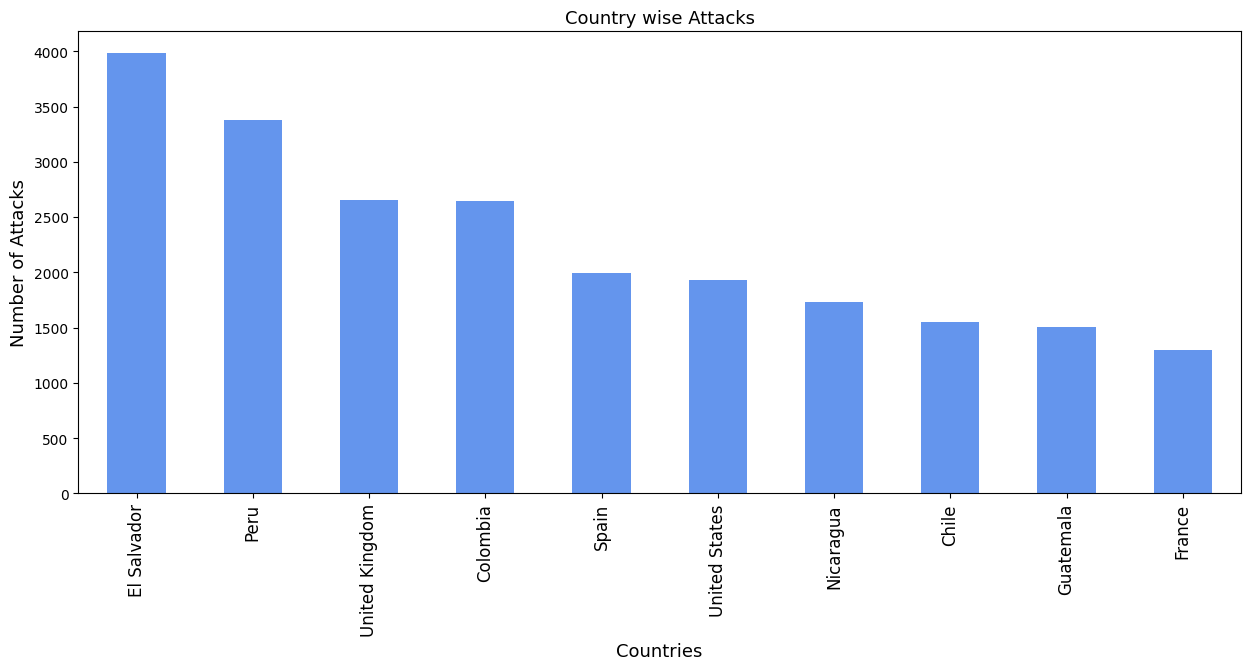

In [36]:
ct.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties (Killed + Wounded) in each Country

In [37]:
cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10)

,Casualty
Country,
El Salvador,13483.0
Nicaragua,11826.0
Lebanon,8669.0
Peru,8587.0
Colombia,6482.0
Sri Lanka,5785.0
Guatemala,5725.0
Philippines,5724.0
United Kingdom,4942.0


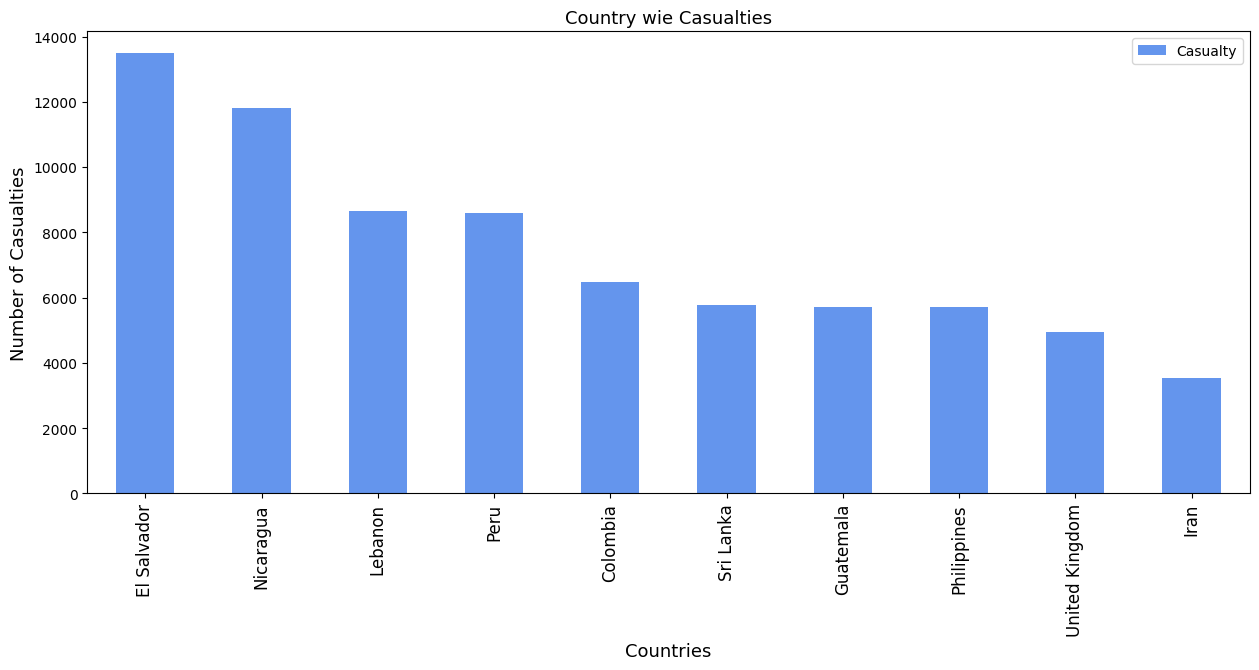

In [38]:
cnc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed in each Country

In [39]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10)

,Killed
Country,
El Salvador,10695.0
Nicaragua,10311.0
Peru,6866.0
Colombia,4917.0
Guatemala,4793.0
Sri Lanka,3419.0
Philippines,2632.0
Lebanon,2594.0
United Kingdom,2434.0


4. Wounded in each Country

In [40]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10)

,Wounded
Country,
Lebanon,6075.0
Philippines,3092.0
El Salvador,2788.0
United Kingdom,2508.0
Iran,2502.0
Sri Lanka,2366.0
South Africa,1760.0
Pakistan,1758.0
Peru,1721.0


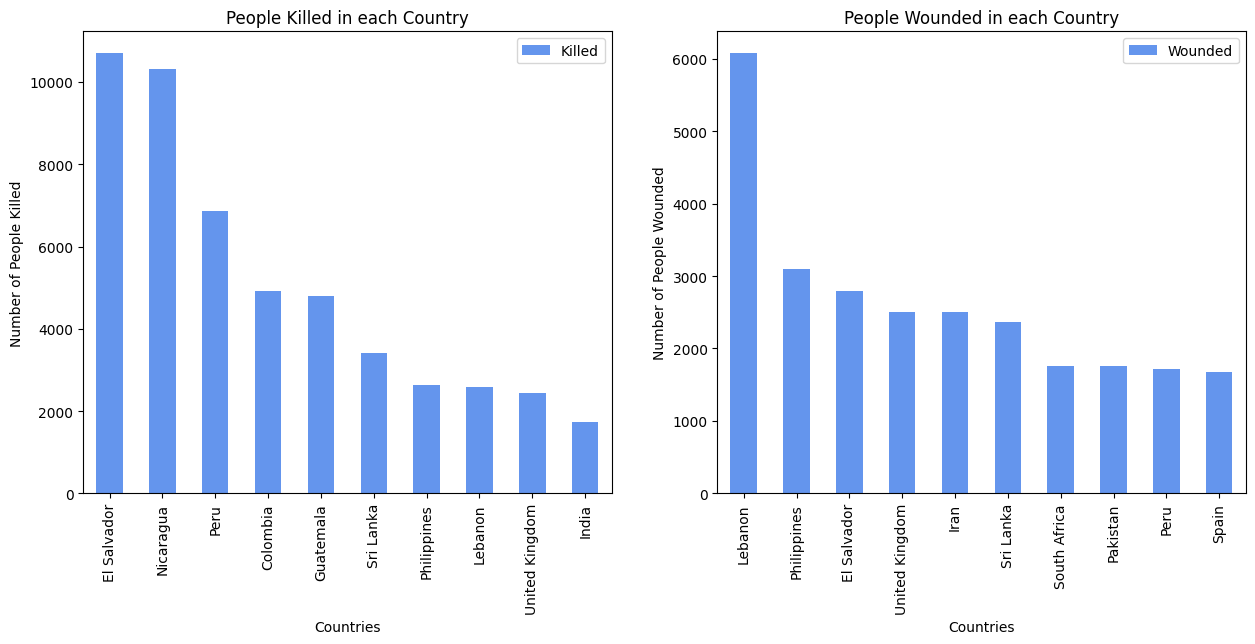

In [41]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 4. City wise Attacks - Top 10

1. Number of Attacks in each city

In [42]:
city=df["City"].value_counts()[1:11]
city

Lima              1239
Belfast           1184
San Salvador      1174
Santiago          1040
Beirut             642
Guatemala City     510
Paris              498
Bogota             495
Rome               489
New York City      400
Name: City, dtype: int64

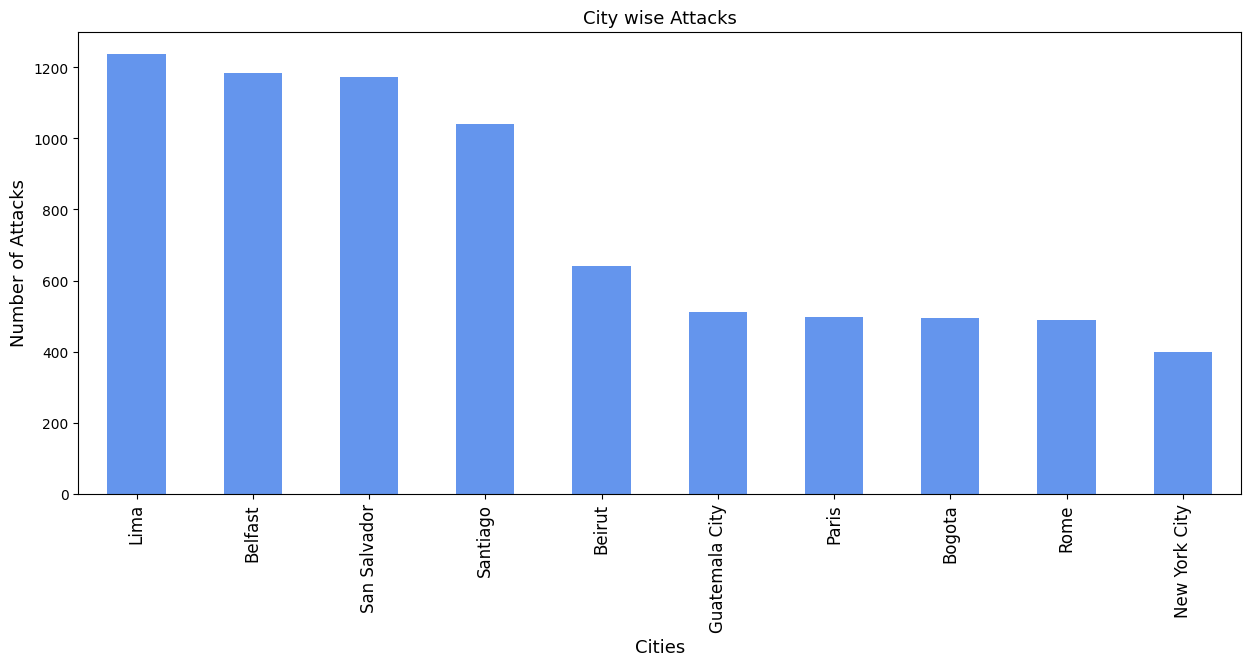

In [43]:
city.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties (Killed + Wounded) in each City

In [44]:
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10)

,Casualty
City,
Beirut,5089.0
Tehran,2154.0
Belfast,1724.0
Colombo,1350.0
San Salvador,1162.0
Tripoli,1130.0
Paris,920.0
Guatemala City,841.0
London,838.0


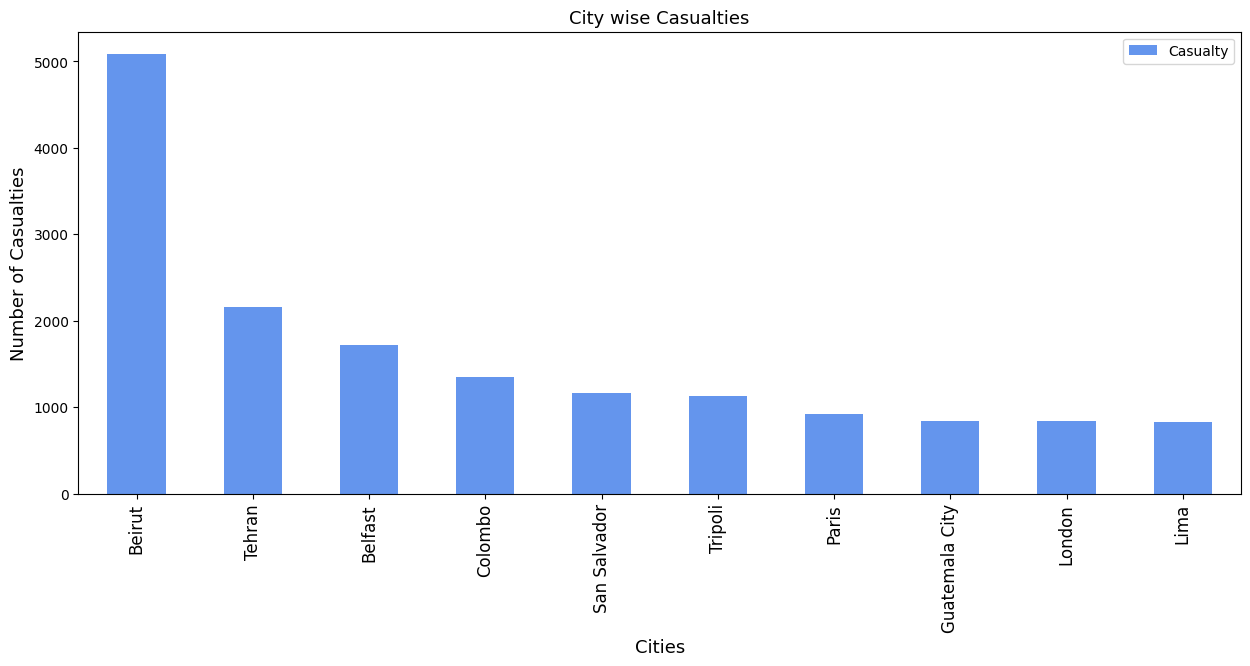

In [45]:
cc[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed in each City

In [46]:
ck=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(10)

,Killed
City,
Beirut,1545.0
Belfast,1115.0
San Salvador,823.0
Suchitoto,567.0
Guatemala City,549.0
Colombo,478.0
Abadan,429.0
Tehran,397.0
Tripoli,396.0


4. Wounded in each City

In [47]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(10)

,Wounded
City,
Beirut,3544.0
Tehran,1757.0
Colombo,872.0
Paris,824.0
The Dalles,778.0
London,771.0
Jerusalem,749.0
Tripoli,734.0
Belfast,609.0


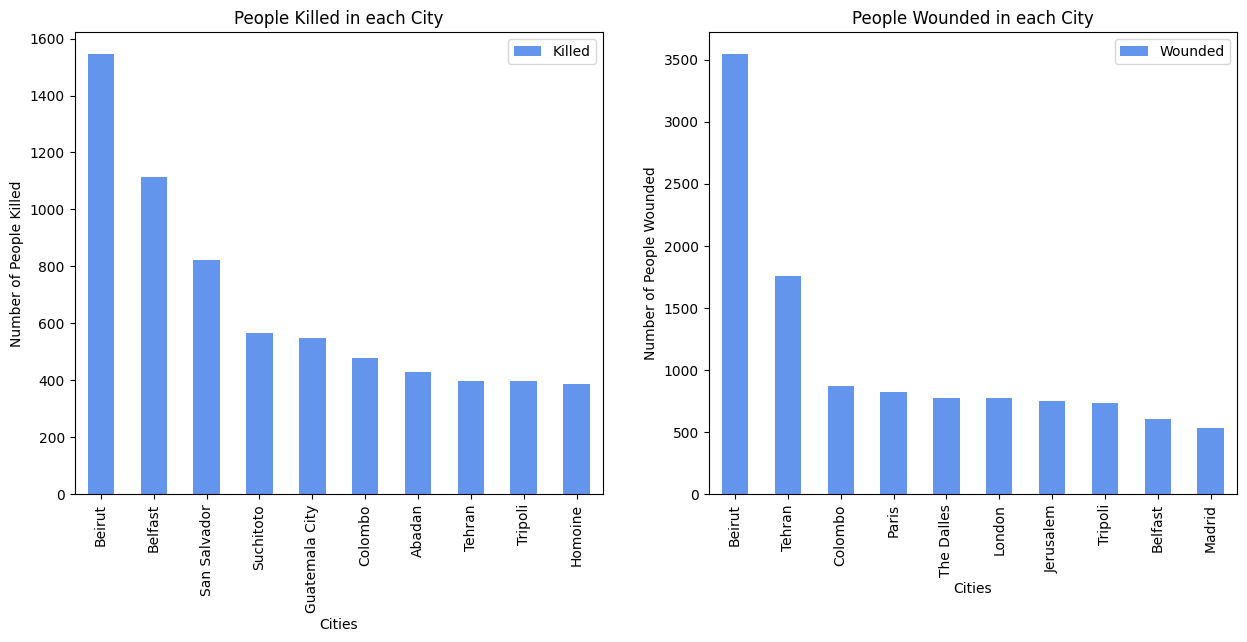

In [48]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
cw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

### 5. Terrorist Group wise Attacks - Top 10

1. Number of Attacks by each Group

In [49]:
grp=df["Group Name"].value_counts()[1:10]
grp

Shining Path (SL)                                   2553
Farabundo Marti National Liberation Front (FMLN)    2115
Irish Republican Army (IRA)                         1737
Basque Fatherland and Freedom (ETA)                 1215
Nicaraguan Democratic Force (FDN)                    895
Revolutionary Armed Forces of Colombia (FARC)        557
Manuel Rodriguez Patriotic Front (FPMR)              556
M-19 (Movement of April 19)                          538
Palestinians                                         494
Name: Group Name, dtype: int64

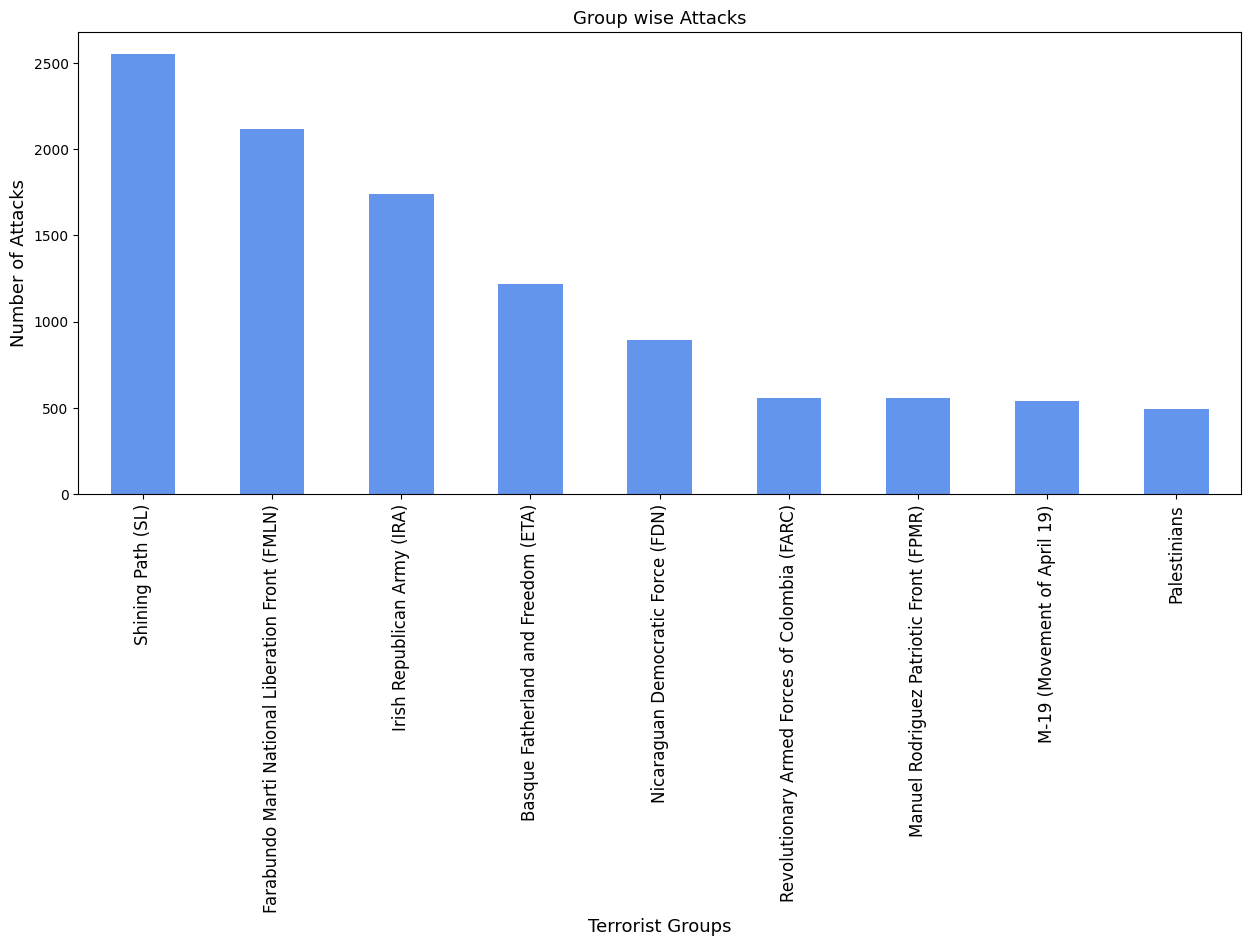

In [50]:
grp.plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

2. Total Casualties(Killed + Wounded) by each Group

In [51]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head(10)

,Casualty
Group Name,
Farabundo Marti National Liberation Front (FMLN),8804.0
Shining Path (SL),7971.0
Nicaraguan Democratic Force (FDN),7396.0
Irish Republican Army (IRA),3627.0
New People's Army (NPA),2533.0
Liberation Tigers of Tamil Eelam (LTTE),2377.0
Tamils,2325.0
Democratic Revolutionary Alliance (ARDE),2040.0
Revolutionary Armed Forces of Colombia (FARC),1936.0


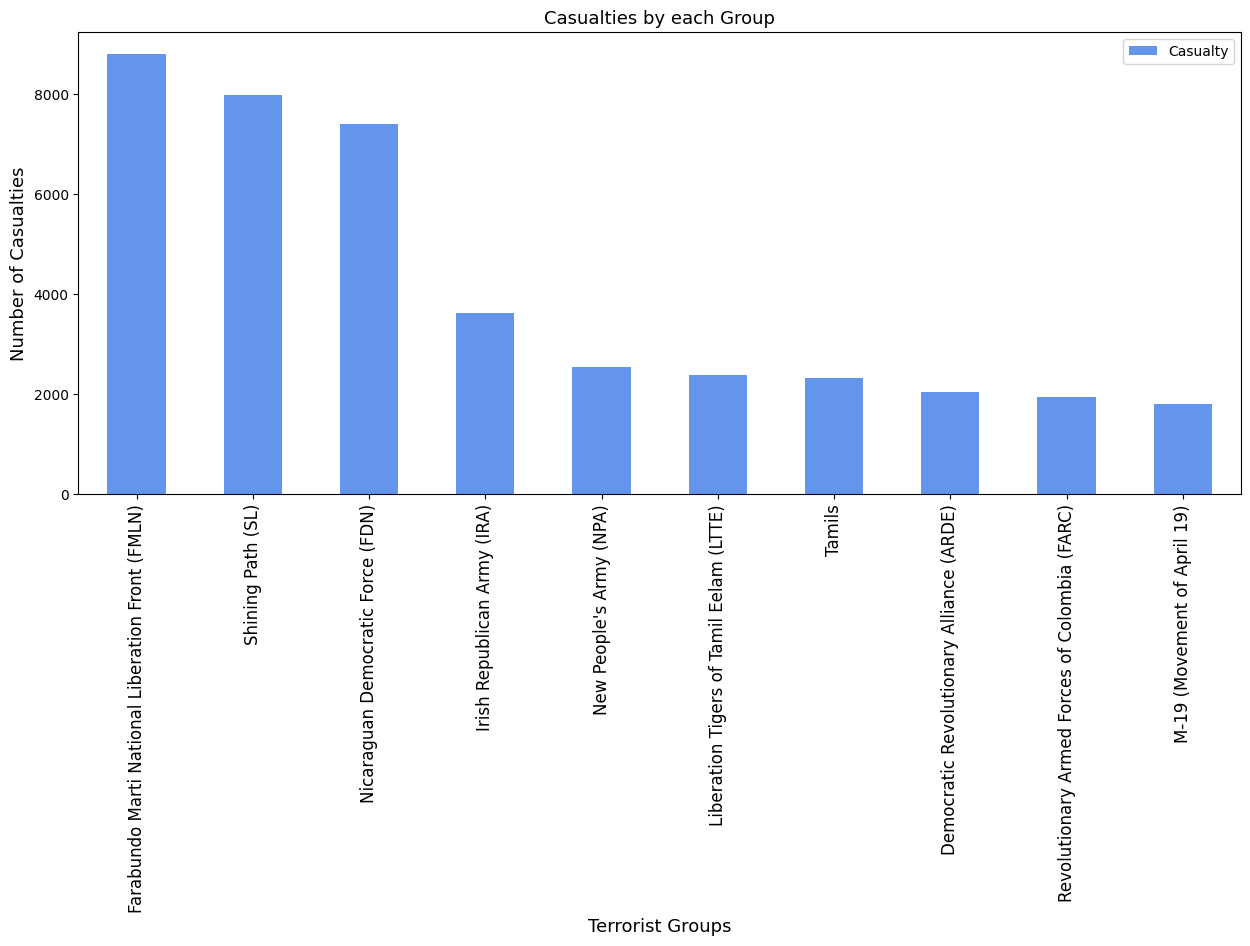

In [52]:
gc.head(10).plot(kind="bar",color="cornflowerblue",figsize=(15,6))
plt.title("Casualties by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

3. Killed by each Group

In [53]:
gk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10)

,Killed
Group Name,
Farabundo Marti National Liberation Front (FMLN),6808.0
Nicaraguan Democratic Force (FDN),6662.0
Shining Path (SL),6580.0
Democratic Revolutionary Alliance (ARDE),1803.0
Revolutionary Armed Forces of Colombia (FARC),1609.0
New People's Army (NPA),1506.0
Irish Republican Army (IRA),1495.0
Liberation Tigers of Tamil Eelam (LTTE),1403.0
Tamils,1397.0


4. Wounded by each Group

In [54]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)


,Wounded
Group Name,
Irish Republican Army (IRA),2132.0
Farabundo Marti National Liberation Front (FMLN),1996.0
Shining Path (SL),1391.0
African National Congress (South Africa),1188.0
Basque Fatherland and Freedom (ETA),1148.0
New People's Army (NPA),1027.0
Liberation Tigers of Tamil Eelam (LTTE),974.0
Tamils,928.0
Palestinians,882.0


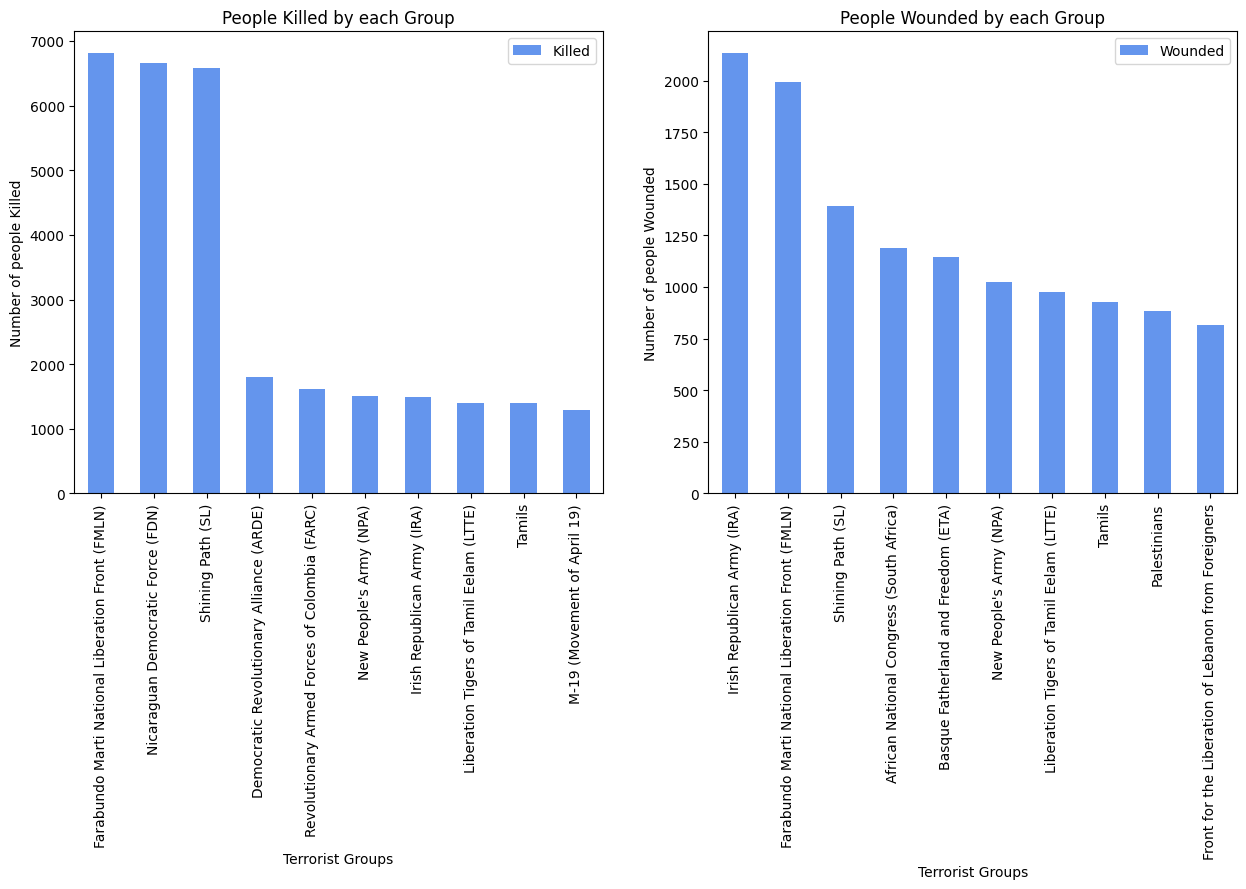

In [55]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
gw[:10].plot(kind="bar",color="cornflowerblue",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

# Observations

1. Year wise Attacks : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 3160 in 1984 <br>
 &ensp; &ensp; (b) Least number of attacks: 471 in 1971 <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 15980 in 1984 <br>
 &ensp; &ensp; (b) Least number of casualties: 255 in 1971 <br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed: 11200 in 1984 <br>
 &ensp; &ensp; (b) Least number of people killed: 273 in 1971 <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded: 5880 in 2015 <br>
 &ensp; &ensp; (b) Least number of people wounded: 230 in 1971 <br><br>
2. Region wise Attacks : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 1440 in "South America"  <br>
 &ensp; &ensp; (b) Least number of attacks: 340 in "Eastern Europe"   <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 8698 in "South America" <br>
 &ensp; &ensp; (b) Least number of casualties: 53 in "Eastern Europe"<br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed: 16755 in "South America" <br>
 &ensp; &ensp; (b) Least number of people killed: 43 in "Eastern Europe" <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded: 12348 in "South America" <br>
 &ensp; &ensp; (b) Least number of people wounded: 68 in "Eastern Europe" <br><br>
3. Country wise Attacks [Top 10] : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 3980 in "El Salvador" <br>
 &ensp; &ensp; (b) Least number of attacks: 1294 in "France" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 13423 in "El Salvador " <br>
 &ensp; &ensp; (b) Least number of casualties: 3552 in "Iran" <br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed: 10695 in "El Salvador" <br>
 &ensp; &ensp; (b) Least number of people killed: 1745 in "India" <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded: 6075 in "Labanom" <br>
 &ensp; &ensp; (b) Least number of people wounded: 1678 in "Spain" <br><br>
4. City wise Attacks [Top 10] : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks: 1239 in "Lima" <br>
 &ensp; &ensp; (b) Least number of attacks: 400 in "New York" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties: 5089 in "Beirut" <br>
 &ensp; &ensp; (b) Least number of casualties: 832 in "Lima" <br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed: 1545 in "Beirut" <br>
 &ensp; &ensp; (b) Least number of people killed: 388 in "Homonia" <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded: 3544 in "Beirut" <br>
 &ensp; &ensp; (b) Least number of people wounded: 537 in "Madrid" <br><br>
5. Terrorist Group wise Attacks [Top 10] : <br>
&nbsp; (i) Attacks <br>
 &ensp; &ensp; (a) Most number of attacks : 2553 by "Shining Path" <br>
 &ensp; &ensp; (b) Least number of attacks : 494 by "palestinians" <br>
&nbsp; (ii) Casualties <br>
 &ensp; &ensp; (a) Most number of casualties :6808 by "Farabundo Marti National Liberation Front (FMLN)"<br>
 &ensp; &ensp; (b) Least number of casualties : 1297 by "M-19 (Movement of April 19)"	<br>
&nbsp; (iii) Killed <br>
 &ensp; &ensp; (a) Most number of people killed : 6808 by "Farabundo Marti National Liberation Front (FMLN)" <br>
 &ensp; &ensp; (b) Least number of people killed : 1297 by "M-19 (Movement of April 19)" <br>
&nbsp; (iv) Wounded<br>
 &ensp; &ensp; (a) Most number of people wounded : 2132 by "Irish Republican Army (IRA)" <br>
 &ensp; &ensp; (b) Least number of people wounded : 815 by "Front for the Liberation of Lebanon from Foreigners	" <br><br>